In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive




1.   **Event logs dataset**




In [ ]:
import pandas as pd
df=pd.read_csv('/content/JFH_event logs_PM.csv')

In [ ]:
#Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case_ID      1854 non-null   object 
 1   Activity     1854 non-null   object 
 2   Timestamp    1841 non-null   object 
 3   CSM          1854 non-null   object 
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   7 non-null      object 
 6   Unnamed: 6   7 non-null      object 
 7   Unnamed: 7   5 non-null      object 
 8   Unnamed: 8   7 non-null      object 
 9   Unnamed: 9   7 non-null      object 
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
dtypes: float64(5), object(9)
memory usage: 203.0+ KB
None


In [ ]:
df

,Case_ID,Activity,Timestamp,CSM,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,REF3X,Customer request,5/26/2023 10:24,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,REF3X,Create user,5/27/2023 20:00,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,REF3X,End pilot,7/29/2023 15:26,FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,REF10N,Customer request,6/1/2023 14:18,DN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,REF10N,Create user,6/3/2023 16:42,DN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,REF1186G,Prepare onboarding material,7/15/2023 20:13,RK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,REF1186G,Send reminder/support material,7/28/2023 14:17,RK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,REF1186G,Prepare offer plan,9/4/2023 5:27,RK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,REF1186G,End pilot,9/20/2023 10:00,RK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_drop = [4,5,6,7,8,9,10,11,12,13]

In [ ]:
df = df.drop(df.columns[columns_to_drop], axis=1)

In [ ]:
df

,Case_ID,Activity,Timestamp,CSM
0,REF3X,Customer request,5/26/2023 10:24,FC
1,REF3X,Create user,5/27/2023 20:00,FC
2,REF3X,End pilot,7/29/2023 15:26,FC
3,REF10N,Customer request,6/1/2023 14:18,DN
4,REF10N,Create user,6/3/2023 16:42,DN
...,...,...,...,...
1850,REF1186G,Prepare onboarding material,7/15/2023 20:13,RK
1851,REF1186G,Send reminder/support material,7/28/2023 14:17,RK
1852,REF1186G,Prepare offer plan,9/4/2023 5:27,RK
1853,REF1186G,End pilot,9/20/2023 10:00,RK


from matplotlib import pyplot as plt
df['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('CSM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CSM')):
  _plot_series(series, series_name, i)
  fig.legend(title='CSM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp'}, axis=1)
              .sort_values('Timestamp', ascending=True))
  xs = counted['Timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CSM')):
  _plot_series(series, series_name, i)
  fig.legend(title='CSM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CSM')):
  _plot_series(series, series_name, i)
  fig.legend(title='CSM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Timestamp'}, axis=1)
              .sort_values('Timestamp', ascending=True))
  xs = counted['Timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('CSM')):
  _plot_series(series, series_name, i)
  fig.legend(title='CSM', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['CSM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Duration', y='CSM', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1855 entries, 0 to 1854
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Case_ID    1854 non-null   object
 1   Activity   1854 non-null   object
 2   Timestamp  1841 non-null   object
 3   CSM        1854 non-null   object
dtypes: object(4)
memory usage: 58.1+ KB
None


In [ ]:
# Review header
print(df.columns)

Index(['Case_ID', 'Activity', 'Timestamp', 'CSM'], dtype='object')


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Case_ID       1
Activity      1
Timestamp    14
CSM           1
dtype: int64


In [ ]:
# Descriptive statistics for numerical variables
print("Descriptive statistics:\n", df.describe())

Descriptive statistics:
         Case_ID           Activity         Timestamp   CSM
count      1854               1854              1841  1854
unique      312                  9              1813     4
top     REF534W  Customer request   10/23/2023 19:20    DN
freq         12                329                 3   688


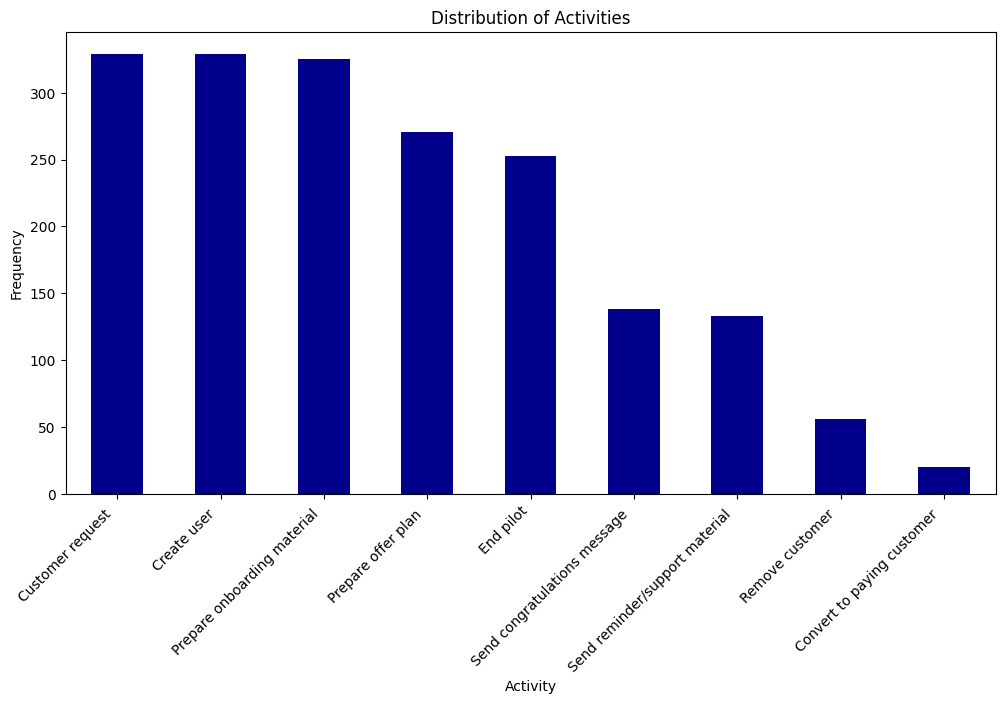

In [ ]:
# Visualize the distribution of activities
# Count the occurrences of each activity
activity_counts = df['Activity'].value_counts()


# Plot the distribution using a bar chart
plt.figure(figsize=(12, 6))
activity_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<ipython-input-182-3150f1380efe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['CSM'], palette='Dark2')


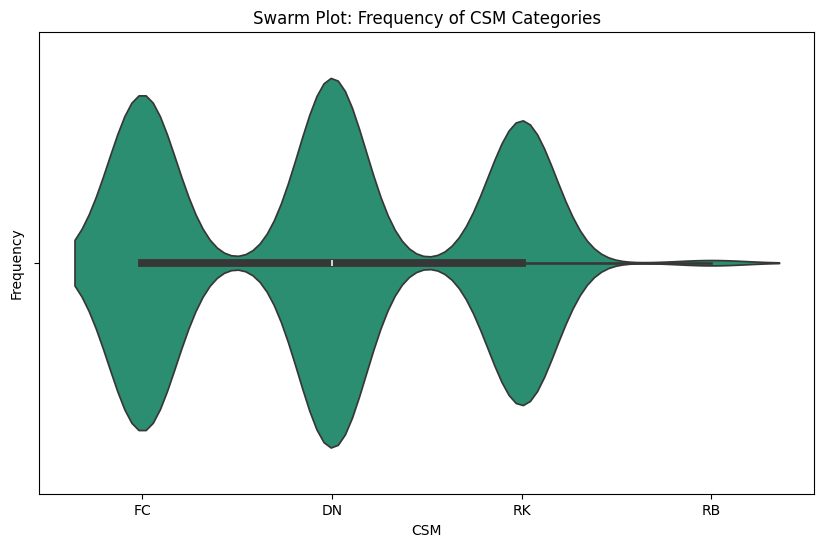

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['CSM'], palette='Dark2')
plt.title('Frequency of CSM')
plt.xlabel('CSM')
plt.ylabel('Frequency')
plt.show()

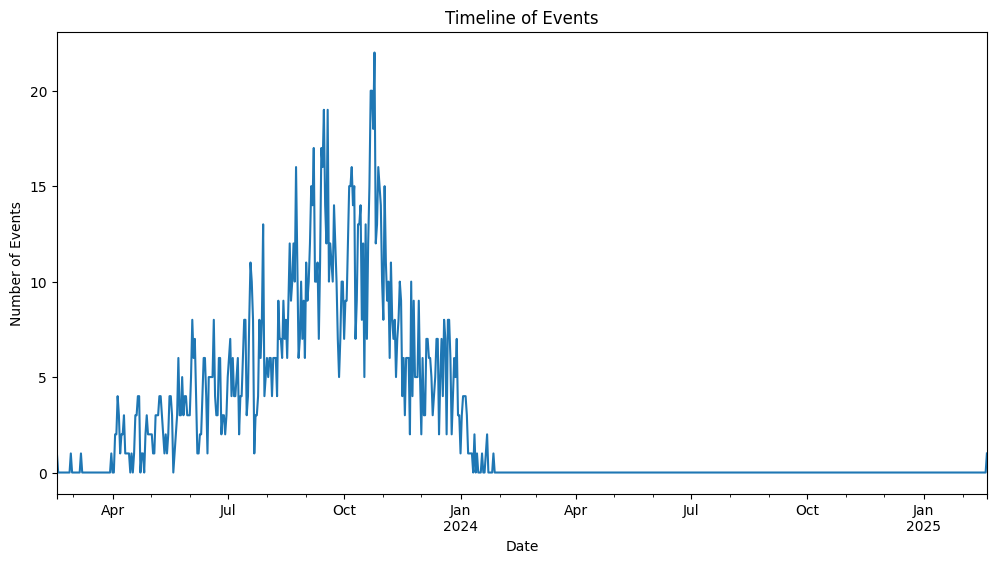

In [ ]:
# Visualize the timeline of events
plt.figure(figsize=(12, 6))
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp')['Case_ID'].resample('D').count().plot()
plt.title('Timeline of Events')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

2. **Customer feedback dataset**

In [ ]:
import pandas as pd
df_fb=pd.read_csv('/content/Feedback_data.csv')

In [ ]:
#Basic information about the dataset
print(df_fb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  421 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB
None


In [ ]:
df_fb

,Review
0,I found the process to be incredibly efficient...
1,"The process was a bit cumbersome, and I strugg..."
2,I was impressed by how quickly the process was...
3,There were some technical glitches encountered...
4,The support team was fantastic! They were resp...
...,...
416,Customer journey support offered standard guid...
417,The talent pool showcased candidates with dive...
418,"The platform's features were functional, cover..."
419,"The pricing structure, while competitive, may ..."


In [ ]:
df_fb.head()

,Review
0,I found the process to be incredibly efficient...
1,"The process was a bit cumbersome, and I strugg..."
2,I was impressed by how quickly the process was...
3,There were some technical glitches encountered...
4,The support team was fantastic! They were resp...


In [ ]:
df_fb.columns


Index(['Review'], dtype='object')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize each document
tokenized_documents = [word_tokenize(document) for document in df_fb.Review]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_documents

[['I',
  'found',
  'the',
  'process',
  'to',
  'be',
  'incredibly',
  'efficient',
  'and',
  'user-friendly',
  '.',
  'The',
  'step-by-step',
  'instructions',
  'made',
  'it',
  'easy',
  'for',
  'me',
  'to',
  'navigate',
  'through',
  'without',
  'any',
  'confusion',
  '.'],
 ['The',
  'process',
  'was',
  'a',
  'bit',
  'cumbersome',
  ',',
  'and',
  'I',
  'struggled',
  'to',
  'find',
  'the',
  'necessary',
  'information',
  '.',
  'It',
  'would',
  'be',
  'helpful',
  'to',
  'have',
  'clearer',
  'guidelines',
  'or',
  'a',
  'more',
  'intuitive',
  'layout',
  'to',
  'improve',
  'the',
  'user',
  'experience',
  '.'],
 ['I',
  'was',
  'impressed',
  'by',
  'how',
  'quickly',
  'the',
  'process',
  'was',
  'completed',
  '.',
  'The',
  'automated',
  'features',
  'streamlined',
  'everything',
  ',',
  'saving',
  'me',
  'a',
  'lot',
  'of',
  'time',
  '.'],
 ['There',
  'were',
  'some',
  'technical',
  'glitches',
  'encountered',
  'duri

In [ ]:
# Count tokens in each document
document_token_counts = [len(tokens) for tokens in tokenized_documents]

# Total token count for the dataset
total_tokens = sum(document_token_counts)

print(f'Total Tokens in Dataset: {total_tokens}')


Total Tokens in Dataset: 9385


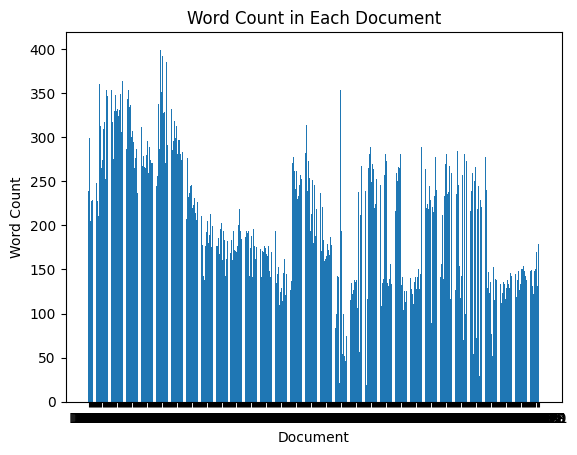

In [ ]:
import matplotlib.pyplot as plt


# Calculate word count for each document
word_counts = [len(doc) for doc in tokenized_documents]

# Plotting
plt.bar(range(1, len(word_counts) + 1), word_counts, tick_label=[f"Doc {i}" for i in range(1, len(word_counts) + 1)])
plt.xlabel('Document')
plt.ylabel('Word Count')
plt.title('Word Count in Each Document')
plt.show()


In [ ]:
word_counts

[239,
 299,
 205,
 228,
 229,
 236,
 204,
 248,
 227,
 210,
 360,
 312,
 265,
 274,
 309,
 317,
 252,
 353,
 346,
 312,
 334,
 353,
 317,
 275,
 330,
 348,
 330,
 332,
 324,
 331,
 349,
 306,
 363,
 288,
 315,
 286,
 343,
 353,
 334,
 336,
 300,
 307,
 294,
 265,
 276,
 287,
 237,
 240,
 276,
 311,
 267,
 279,
 266,
 265,
 280,
 296,
 259,
 289,
 274,
 271,
 271,
 305,
 268,
 245,
 256,
 337,
 286,
 399,
 351,
 392,
 327,
 328,
 271,
 385,
 291,
 334,
 322,
 332,
 285,
 296,
 318,
 299,
 312,
 281,
 297,
 297,
 281,
 274,
 283,
 295,
 225,
 207,
 276,
 232,
 237,
 244,
 246,
 220,
 223,
 231,
 214,
 206,
 226,
 185,
 215,
 210,
 178,
 143,
 138,
 176,
 192,
 205,
 180,
 189,
 213,
 175,
 199,
 193,
 189,
 177,
 177,
 186,
 167,
 196,
 203,
 161,
 194,
 183,
 143,
 162,
 182,
 169,
 169,
 183,
 161,
 193,
 172,
 171,
 170,
 176,
 200,
 218,
 193,
 185,
 180,
 171,
 187,
 193,
 191,
 193,
 143,
 174,
 188,
 141,
 196,
 176,
 162,
 175,
 184,
 164,
 173,
 141,
 171,
 170,
 176,
 174,
 167

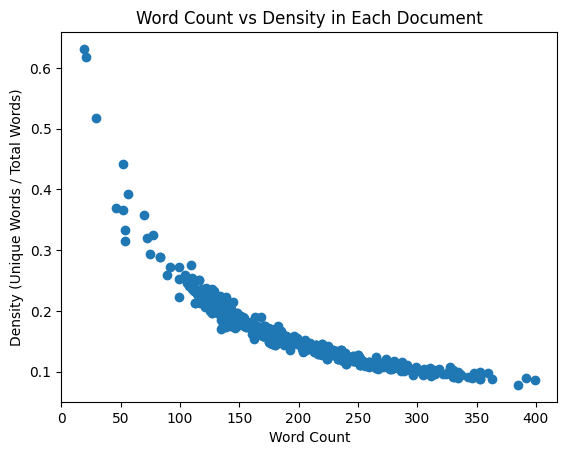

In [ ]:
import matplotlib.pyplot as plt

# Calculate word count and density for each document
unique_word_counts = [len(set(doc)) for doc in tokenized_documents]
density_values = [unique_words / total_words for unique_words, total_words in zip(unique_word_counts, word_counts)]

# Plotting
plt.scatter(word_counts, density_values)
plt.xlabel('Word Count')
plt.ylabel('Density (Unique Words / Total Words)')
plt.title('Word Count vs Density in Each Document')
plt.show()
